In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv ('https://raw.githubusercontent.com/Owen3vans/4105HW0/Main/D3.csv')
df.head()
M=len(df) ##length of data set
M         ## verifies correct data set

100

In [146]:
x= df.values[:,0] #x1 values
y= df.values[:,3] #y values
m= len(x) #number of training values could be x or y
m #verify number of entries 

100

In [147]:
print('X = ', x[: 5]) #first 5 values of x and y for verification
print('Y = ', y[: 5])

X =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


In [148]:
x0 = np.ones((m,1)) #create matrix all 1s
x0[:5]


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [149]:
x1 = x.reshape(m, 1) #create matrix with x1 values 
x1[:5]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616]])

In [150]:
x = np.hstack((x0,x1)) #combines x0 x1 array
x[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [151]:
theta = np.zeros(2) #theta value set to zero
theta

array([0., 0.])

In [152]:
def compute_cost(x,y,theta):
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J= 1/(2*m)*np.sum(sqrErrors)
    return J

In [153]:
cost = compute_cost(x,y,theta)
print(cost)

5.524438459196242


In [154]:
def Gradiant_decent (x,y,theta,alpha,itterations):
    cost_history= np.zeros(itterations)
    for i in range(itterations):
        predictions= x.dot(theta)
        errors= np.subtract(predictions, y)
        sum_delta= (alpha / m)* x.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i]= compute_cost(x,y,theta)
    return theta, cost_history

In [155]:
theta =[0.,0.] #set theta to 0
itterations = 1500;
alpha=0.1;

In [156]:
theta, cost_history = Gradiant_decent(x,y,theta,alpha,itterations)
print('Final value of theta= ' ,theta)
print('cost history= ', cost_history)

Final value of theta=  [ 5.92794892 -2.03833663]
cost history=  [5.16999006 4.96338989 4.7855721  ... 0.98499308 0.98499308 0.98499308]


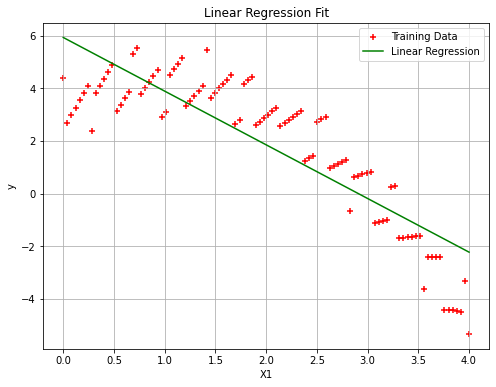

In [162]:
plt.scatter(x[:,1], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(x[:,1],x.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('X1') 
plt.ylabel('y') 
plt.title('Linear Regression Fit') 
plt.legend() 

Text(0.5, 1.0, 'Convergence of gradient descent')

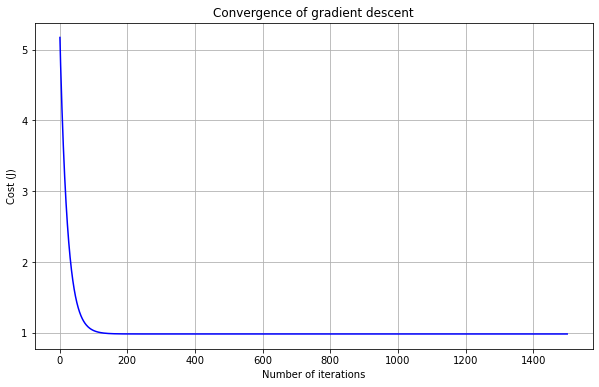

In [158]:
plt.plot(range(1, itterations + 1),cost_history, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 

In [159]:
#alpha value of 0.1 gives lowest loss the quickest with cost =1 at 100 itterations
#alpha value of 0.01 gives cost= 1 at 1100 iterations
#alpha = 0.05 gives cost= 1 at 250 itterations